In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

In [4]:
df = pd.read_csv('data/classroom_actions.csv')
df.head()

,timestamp,id,group,total_days,completed
0,2015-08-10 17:06:01.032740,610019,experiment,97,True
1,2015-08-10 17:15:28.950975,690224,control,75,False
2,2015-08-10 17:34:40.920384,564994,experiment,128,True
3,2015-08-10 17:50:39.847374,849588,experiment,66,False
4,2015-08-10 19:10:40.650599,849826,experiment,34,False


In [5]:
# get the average classroom time for control group
control_mean = df.query('group == "control"').total_days.mean()

# get the average classroom time for experiment group
experiment_mean = df.query('group == "experiment"').total_days.mean()

# display average classroom time for each group
control_mean, experiment_mean

(73.36899038461539, 74.6715935334873)

In [32]:
# Get dataframe with all records from experiment group
experiment_df = df.query('group == "experiment"')

# Compute click through rate for experiment group
experiment_ctr = experiment_df.query('action == "enroll"').id.nunique() / experiment_df.query('action == "view"').id.nunique()

# Display click through rate
experiment_ctr

0.2668693009118541

In [6]:
# compute observed difference in classroom time
observed_diff = experiment_mean - control_mean

# display observed difference
observed_diff

1.3026031488719099

In [7]:
# create sampling distribution of difference in average classroom times
# with boostrapping
diffs = []
for i in range(10000):
    test_sample = df.sample(df.shape[0], replace=True)
    control_mean = test_sample.query('group == "control"').total_days.mean()
    experiment_mean = test_sample.query('group == "experiment"').total_days.mean()
    diffs.append(experiment_mean - control_mean)

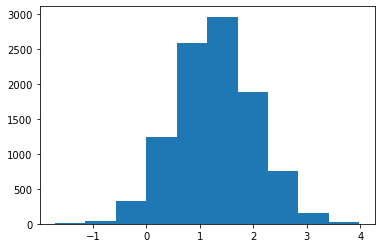

In [8]:
# Convert to numpy array
diffs = np.array(diffs)

# Plot sampling distribution
plt.hist(diffs);

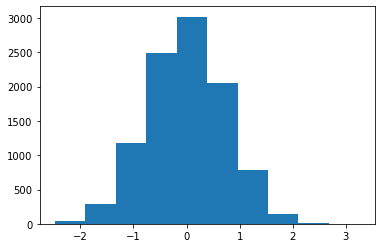

In [9]:
# Simulate distribution under the null hypothesis
null_values = np.random.normal(0, diffs.std(), diffs.size)

# Plot the null distribution
plt.hist(null_values);

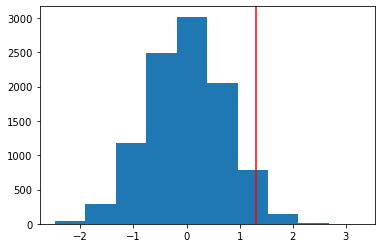

In [10]:
# Plot observed statistic with the null distibution
plt.hist(null_values);
plt.axvline(x = observed_diff, color = 'red');

In [11]:
# Compute p-value
p_value = (null_values > observed_diff).mean()
p_value

0.0384